In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


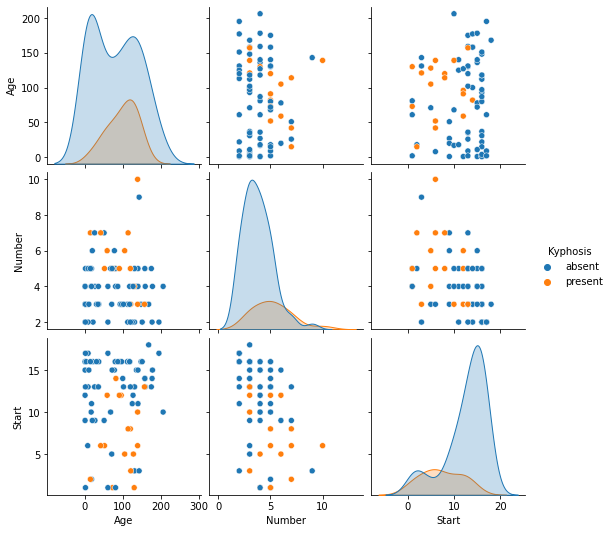

In [5]:
sns.pairplot(df,hue='Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

## Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier(random_state=40,min_samples_leaf=20,max_depth=2)

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=40)

In [12]:
dtree.score(X_test,y_test)

0.76

In [13]:
dtree.score(X_train,y_train)

0.8035714285714286

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.76      1.00      0.86        19
     present       0.00      0.00      0.00         6

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print(confusion_matrix(y_test,predictions))

[[19  0]
 [ 6  0]]


In [18]:
############################################
# 1. before printing, create a df_train to have X_train and y_train
# 2. whats the shape?
# 3. what are the classes of the dtree (which one is 0 and which one is "1")

In [19]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head(2)

,Age,Number,Start,Kyphosis
62,81,4,1,absent
42,143,9,3,absent


In [20]:
df_train.shape

(56, 4)

In [21]:
df_train['Kyphosis'].value_counts()

absent     45
present    11
Name: Kyphosis, dtype: int64

In [39]:
# copy from the forum the plot tree command

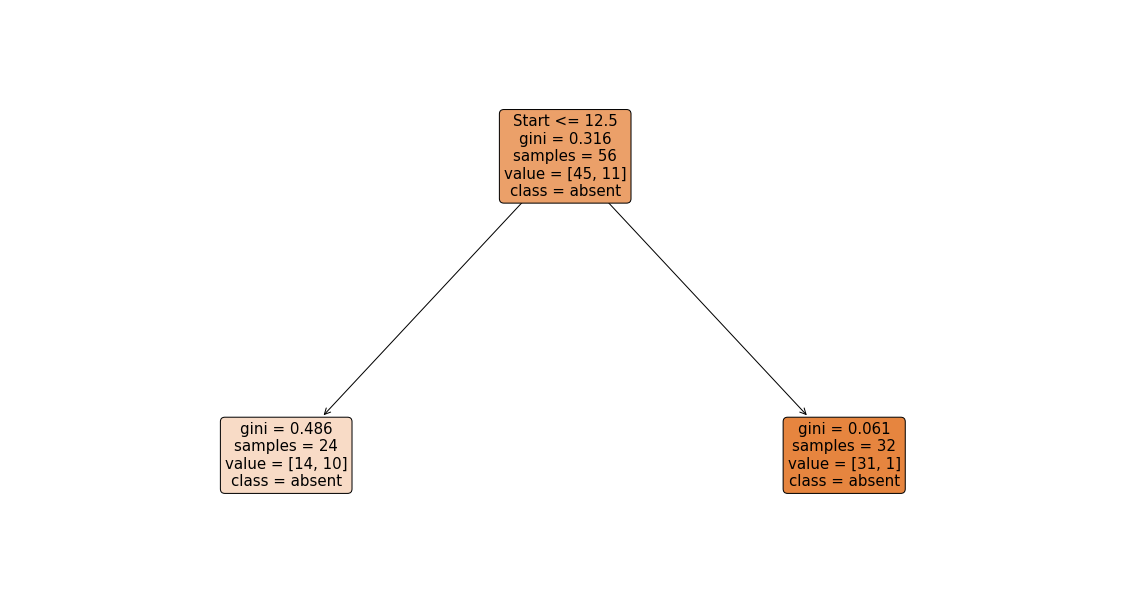

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,11))
a = plot_tree(dtree,
          	feature_names=X.columns,
          	class_names=dtree.classes_,
          	filled=True,
          	rounded=True,
          	fontsize=15)

# second part

In [42]:
##############################
# value = [45, 11] -> 45 for class 0 and 11 for class 1
# make sure the root node is correct, i.e. we have 45 absent and 11 present
# calculate gini for that node


In [23]:
df_train['Kyphosis'].value_counts()

absent     45
present    11
Name: Kyphosis, dtype: int64

In [24]:
round(1 - (45/(45+11))**2 - (11/(45+11))**2,3)

0.316

In [25]:
# what the information gain after the first split?

In [26]:
upper_gini = 0.316

In [65]:
lower_gini = (0.48*15)/56 + (0.093*41)/56
lower_gini

0.19666071428571427

In [67]:
IG = upper_gini - lower_gini

In [68]:
IG

0.11933928571428573

In [69]:
##############################
# lets go the left node (yes <= 8.5)
# verify indeed we have 15 samples and 9 of them are "present"
# calc gini for that node
# calc the gini of left bottom leaf
# what is IG of the split led to it (has gini 0.375)?
# in that node, of gini=0.375, we predict the data to be absent. what is the probability for that?
# probability of being absent, if we reach the bottom right leaf

In [75]:
# lets go the left node (yes <= 8.5)
left_node = df_train[df_train.Start <= 8.5]

In [76]:
# verify indeed we have 15 samples and 9 of them are "present"
left_node.Kyphosis.value_counts()

present    9
absent     6
Name: Kyphosis, dtype: int64

In [77]:
# calc gini for that node
1 - (9/15)**2 - (6/15)**2

0.48

In [ ]:
# calc the gini of left bottom leaf

In [78]:
1 - 0**2 - 1**2

0

In [79]:
# what is IG of the split led to it (has gini 0.375)?
up = 0.375
lg = 0.25 # 2/4 * 0.5 + 0
IG = up - lg
IG

0.125

# last part

In [118]:
##########################################################################
# train a DT with the "rain" dataset from class and plot tree to compare
# if it's different, look at the parameter needed to be changed so it would be the same
# make features x1 and x2 as int x1=(0/1) is hot, x2=(0/1) is wind
# create y feature as string "1" and "0" and not int, so the plot will work

In [27]:
rain_df = pd.DataFrame(data={'hot': [1,1,0,0,1,1],'wind': [1,0,1,1,1,0],'rain':["1","1","1","1","0","0"]})
rain_df

,hot,wind,rain
0,1,1,1
1,1,0,1
2,0,1,1
3,0,1,1
4,1,1,0
5,1,0,0


In [28]:
X = rain_df.drop(columns=['rain'])
y = rain_df['rain']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [30]:
dtree = DecisionTreeClassifier(random_state=40,min_samples_leaf=2)#,max_depth=2)

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=40)

In [32]:
dtree.score(X_test,y_test)

0.0

In [33]:
dtree.score(X_train,y_train)

1.0

In [34]:
predictions = dtree.predict(X_test)

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cla

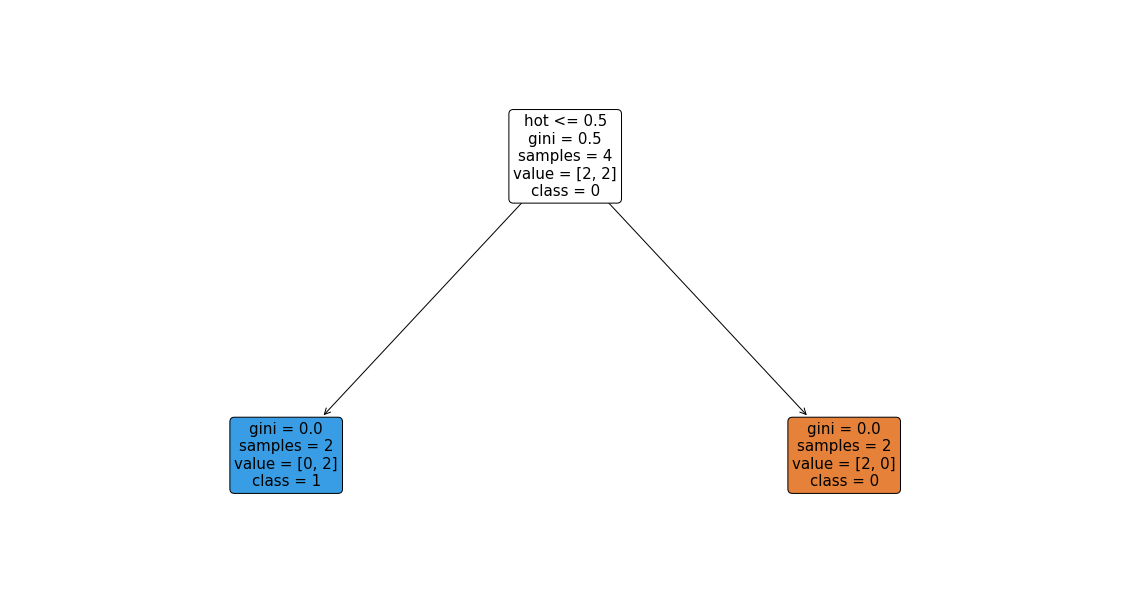

In [132]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,11))
a = plot_tree(dtree,
          	feature_names=X.columns,
          	class_names=dtree.classes_,
          	filled=True,
          	rounded=True,
          	fontsize=15)

## Bootstrap Aggregation

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
model = BaggingClassifier(DecisionTreeClassifier(),n_estimators=20,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
predictions = model.predict(X_test)

## Random Forests

Now let's compare the decision tree model to a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,min_samples_leaf=2)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
rfc.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred))

In [ ]:
rfc.score(X_test,y_test)